

**Question:**

Generate two sets of from a normal distribution and perform a two-sample t-test.

1.Randomly generate 50 values from a normal distribution with a chosen mean (μ1) and standard deviation.

 2.Randomly generate 50 values from a normal distribution with a different mean (μ2) and standard deviation.

Use and determine whether the means differ significantly.

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [14]:
# Define the two random samples
ata1 = np.random.normal(50,10,50)
data2 = np.random.normal(50,10,50)

t_statistic, p_value = stats.ttest_ind(data1, data2, equal_var=False)

#Calculate confidence interval
mean_diff = np.mean(data1) - np.mean(data2)
std_err = np.sqrt(np.var(data1, ddof=1)/len(data1) + np.var(data2, ddof=1)/len(data2))
df = (std_err**4) / ((np.var(data1, ddof=1)/len(data1))**2 / (len(data1)-1) + (np.var(data2, ddof=1)/len(data2))**2 / (len(data2)-1))
ci = stats.t.interval(0.95, df, loc=mean_diff, scale=std_err)

#Display results
print(f"Sample 1 Mean: {np.mean(data1):.2f}")
print(f"Sample 2 Mean: {np.mean(data2):.2f}")
print(f"t-Statistic: {t_statistic:.2f}")
print(f"Degrees of Freedom: {df:.2f}")
print(f"p-Value: {p_value:.4f}")
print(f"Confidence Interval of Mean Difference: [{ci[0]:.2f}, {ci[1]:.2f}]")

Sample 1 Mean: 47.21
Sample 2 Mean: 49.13
t-Statistic: -0.89
Degrees of Freedom: 95.51
p-Value: 0.3755
Confidence Interval of Mean Difference: [-6.20, 2.36]


In [10]:
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis. The means of the two samples are significantly different.")
else:
    print("Fail to reject the null hypothesis. The means of the two samples are not significantly different.")

Fail to reject the null hypothesis. The means of the two samples are not significantly different.


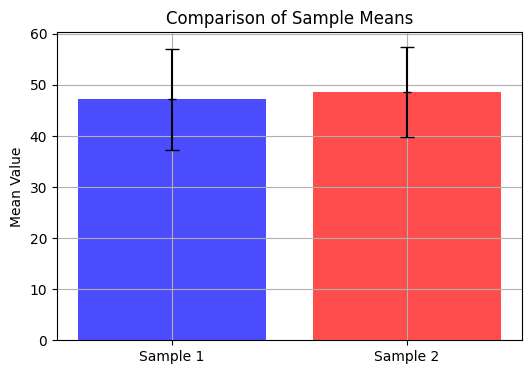

In [13]:
#Visualize the data
plt.figure(figsize=(6, 4))
plt.bar(['Sample 1', 'Sample 2'], [np.mean(data1), np.mean(data2)], color=['blue', 'red'], alpha=0.7)
plt.errorbar(['Sample 1', 'Sample 2'], [np.mean(data1), np.mean(data2)], yerr=[np.std(data1, ddof=1), np.std(data2, ddof=1)], fmt='k_', capsize=5)
plt.title('Comparison of Sample Means')
plt.ylabel('Mean Value')
plt.grid(True)
plt.show()